Alejandro Alquezar Pitarch - Proyecto Universitario

# Análisis previo de los datos

In [6]:
library(readr)
library(dplyr)
library(GGally)
library(ggplot2)

Primero que todo leemos los datos de nuestro archivo csv, indicando que tenemos
cabecera, el separador es “;” y que los decimales se tratan con “,”.

In [42]:
datos <- read.csv("almacén.csv", header = TRUE, sep = ";", encoding = "latin1", dec = ",")

In [43]:
head(datos)

,DNI,tfno,ciudad,sexo,hijos,casapropia,compra,horacompra,gastomensual,díacompra,fecha_nac,edad,compra_A,edadendías,puesto,sueldo,fecha_trab,años_trab,días,hora_cod
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,11.979.539,682.049.331,2,hombre,sí,sí,grandes superficies,17,474.6,sábado,23-may-74,40,fin de semana,14.671,directivo,2.818,13-sep-96,18,6.641,tarde
2,12.747.663,642.032.996,3,mujer,sí,no,grandes superficies,17,451.8,viernes,26-dic-74,40,laborable,14.458,jefe,2.000,24-jul-96,18,6.690,tarde
3,13.025.242,635.777.048,3,mujer,sí,no,grandes superficies,19,724.6,viernes,26-dic-67,47,laborable,16.978,jefe,2.482,03-jun-89,25,9.261,tarde
4,17.643.120,617.838.177,2,mujer,sí,sí,grandes superficies,18,674.2,sábado,30-sep-63,51,fin de semana,18.504,administrativo,1.425,04-jul-85,29,10.670,tarde
5,19.425.576,659.932.179,3,hombre,sí,no,grandes superficies,14,590.3,viernes,12-may-66,48,laborable,17.562,directivo,3.900,20-abr-88,26,9.664,tarde
6,19.800.499,657.097.488,4,mujer,sí,sí,super. barrio,20,623.8,viernes,19-oct-66,48,laborable,17.405,directivo,4.215,16-jul-88,26,9.578,noche


Observando las variables con `head(datos)`, decido quedarme solo con las que pueden
ser útiles para realizar el análisis.

In [44]:
datos <- dplyr::select(datos,
                       c("ciudad", "sexo", "hijos", "casapropia", "compra", "horacompra", "gastomensual", "díacompra", "edad", "compra_A", "puesto",
                         "sueldo", "años_trab", "hora_cod"))

In [45]:
dplyr::glimpse(datos)

Rows: 45
Columns: 14
$ ciudad       <int> 2, 3, 3, 2, 3, 4, 4, 6, 2, 1, 3, 7, 1, 8, 8, 8, 10, 10, 8…
$ sexo         <chr> "hombre", "mujer", "mujer", "mujer", "hombre", "mujer", "…
$ hijos        <chr> "sí", "sí", "sí", "sí", "sí", "sí", "no", "sí", "no", "sí…
$ casapropia   <chr> "sí", "no", "no", "sí", "no", "sí", "no", "no", "no", "no…
$ compra       <chr> "grandes superficies", "grandes superficies", "grandes su…
$ horacompra   <int> 17, 17, 19, 18, 14, 20, 20, 17, 20, 19, 13, 20, 9, 10, 20…
$ gastomensual <dbl> 474.6, 451.8, 724.6, 674.2, 590.3, 623.8, 542.1, 849.4, 9…
$ díacompra    <chr> "sábado", "viernes", "viernes", "sábado", "viernes", "vie…
$ edad         <int> 40, 40, 47, 51, 48, 48, 48, 58, 44, 42, 53, 60, 73, 47, 4…
$ compra_A     <chr> "fin de semana", "laborable", "laborable", "fin de semana…
$ puesto       <chr> "directivo", "jefe", "jefe", "administrativo", "directivo…
$ sueldo       <chr> "2.818", "2.000", "2.482", "1.425", "3.900", "4.215", "1.…
$ años_trab    <int

La variable sueldo sale como char, así que decido cambiar su tipo a integer y a su vez
usando la función `gsub` eliminamos el punto para que quede bien. También
separamos las variables restantes en dos grupos, cuantitativas y cualitativas, para así
realizar el análisis correctamente.

In [46]:
datos$sueldo <- as.integer(gsub("\\.","", datos$sueldo))

cuantitativas <- dplyr::select(datos, c("horacompra", "gastomensual", "edad", "sueldo", "años_trab"))
cualitativas <- dplyr::select(datos, c("ciudad", "sexo", "hijos", "casapropia", "compra", "díacompra", "compra_A", "puesto", "hora_cod"))

In [47]:
str(cuantitativas)

str(cualitativas)

'data.frame':	45 obs. of  5 variables:
 $ horacompra  : int  17 17 19 18 14 20 20 17 20 19 ...
 $ gastomensual: num  475 452 725 674 590 ...
 $ edad        : int  40 40 47 51 48 48 48 58 44 42 ...
 $ sueldo      : int  2818 2000 2482 1425 3900 4215 1943 2451 2774 5690 ...
 $ años_trab   : int  18 18 25 29 26 26 26 37 21 15 ...
'data.frame':	45 obs. of  9 variables:
 $ ciudad    : int  2 3 3 2 3 4 4 6 2 1 ...
 $ sexo      : chr  "hombre" "mujer" "mujer" "mujer" ...
 $ hijos     : chr  "sí" "sí" "sí" "sí" ...
 $ casapropia: chr  "sí" "no" "no" "sí" ...
 $ compra    : chr  "grandes superficies" "grandes superficies" "grandes superficies" "grandes superficies" ...
 $ díacompra : chr  "sábado" "viernes" "viernes" "sábado" ...
 $ compra_A  : chr  "fin de semana" "laborable" "laborable" "fin de semana" ...
 $ puesto    : chr  "directivo" "jefe" "jefe" "administrativo" ...
 $ hora_cod  : chr  "tarde" "tarde" "tarde" "tarde" ...


Antes de comenzar con la representación, convertimos a las variables cualitativas a
factor.

In [48]:
cualitativas <- cualitativas %>%
  mutate_if(is.character, as.factor)
cualitativas$ciudad <- as.factor(cualitativas$ciudad)
str(cualitativas)

'data.frame':	45 obs. of  9 variables:
 $ ciudad    : Factor w/ 10 levels "1","2","3","4",..: 2 3 3 2 3 4 4 6 2 1 ...
 $ sexo      : Factor w/ 2 levels "hombre","mujer": 1 2 2 2 1 2 1 2 1 1 ...
 $ hijos     : Factor w/ 2 levels "no","sí": 2 2 2 2 2 2 1 2 1 2 ...
 $ casapropia: Factor w/ 2 levels "no","sí": 2 1 1 2 1 2 1 1 1 1 ...
 $ compra    : Factor w/ 3 levels "grandes superficies",..: 1 1 1 1 1 2 2 2 1 3 ...
 $ díacompra : Factor w/ 6 levels "jueves","lunes",..: 5 6 6 5 6 6 1 5 5 6 ...
 $ compra_A  : Factor w/ 2 levels "fin de semana",..: 1 2 2 1 2 2 2 1 1 2 ...
 $ puesto    : Factor w/ 3 levels "administrativo",..: 2 3 3 1 2 2 1 1 3 2 ...
 $ hora_cod  : Factor w/ 3 levels "mañana","noche",..: 3 3 3 3 3 2 2 3 2 3 ...


## Representación de los datos

Para las variables cuantitativas realizo una matriz de gráficos, donde arriba de la
diagonal principal encontramos la correlación entre cada variable, debajo de la
diagonal principal encontramos los diagramas de dispersión de las variables y en la
diagonal principal los histogramas de cada variable. Para ello utilizo la función ggpairs
de la librería ggally.

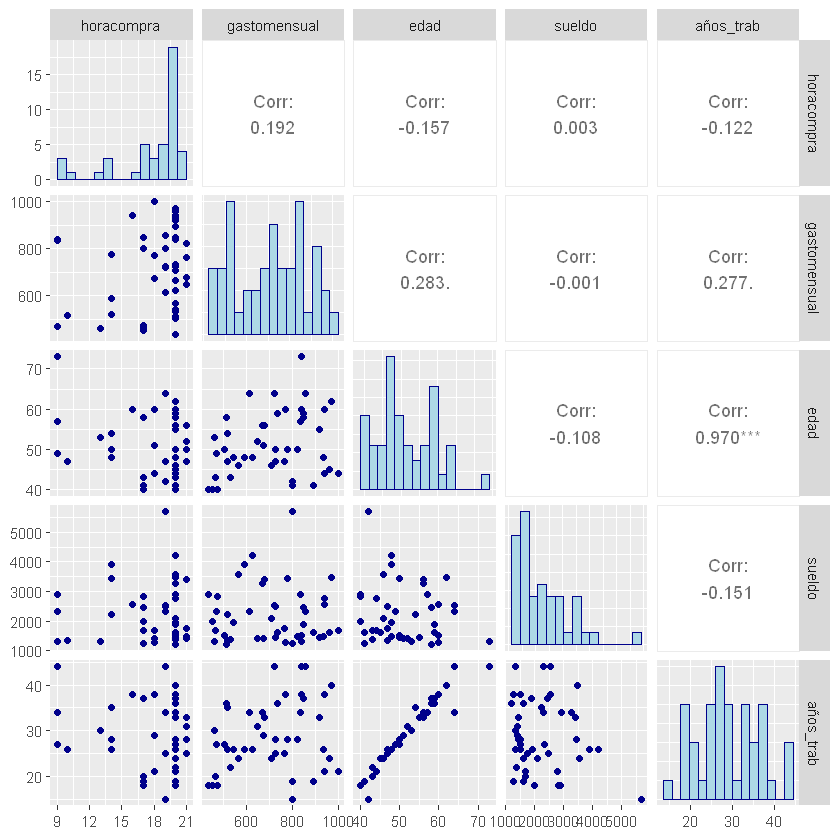

In [23]:
ggpairs(cuantitativas,
        upper = list(continuous = "cor", combo = "box_no_facet"),
        lower = list(continuous = wrap(ggally_points, color = "darkblue")),
        diag = list(continuous = wrap("barDiag", bins = 15, fill ='lightblue', color='darkblue')))

Para la variable cualitativa ciudad, utilizo un gráfico de barras donde observamos la
frecuencia relativa de cada valor.

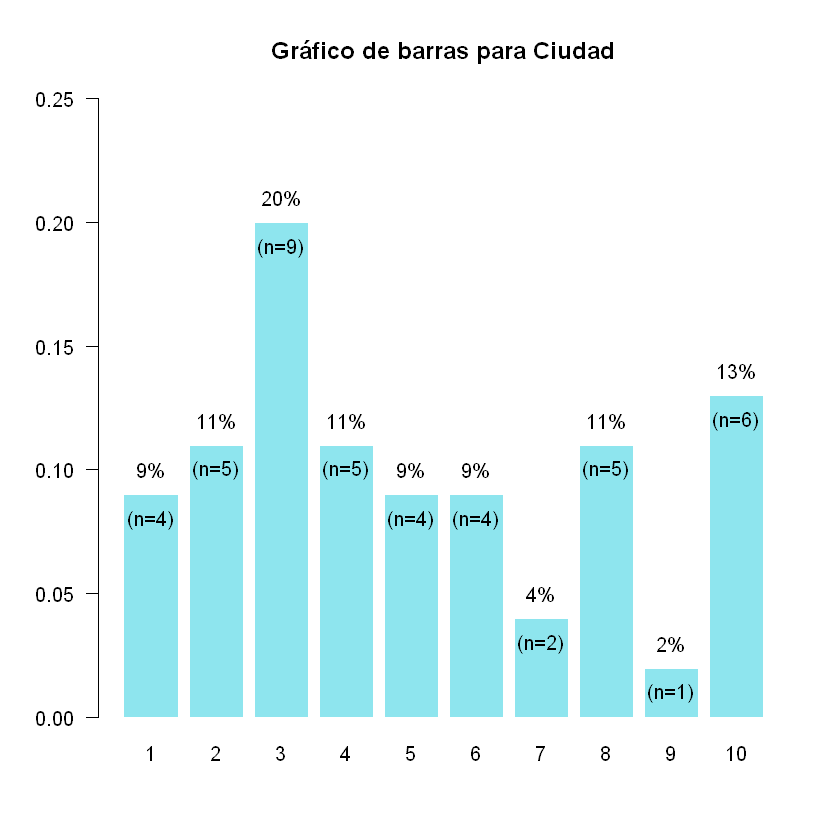

In [24]:
#ciudad
frec_rel1 <- round(prop.table(table(cualitativas$ciudad)), 2)
frec_abs1 <- table(cualitativas$ciudad)
bar1 <- barplot(frec_rel1, border = FALSE,
                las = 1,
                col = "cadetblue2",
                ylim = c(0, 0.25),
                main = "Gráfico de barras para Ciudad")
text(bar1, frec_rel1+0.01, paste0(frec_rel1*100, '%'), col = "black")
text(bar1, frec_rel1 - 0.01, paste0('(n=', frec_abs1, ')'), col = "black")

Para la variable sexo volvemos a realizar un gráfico de barras.

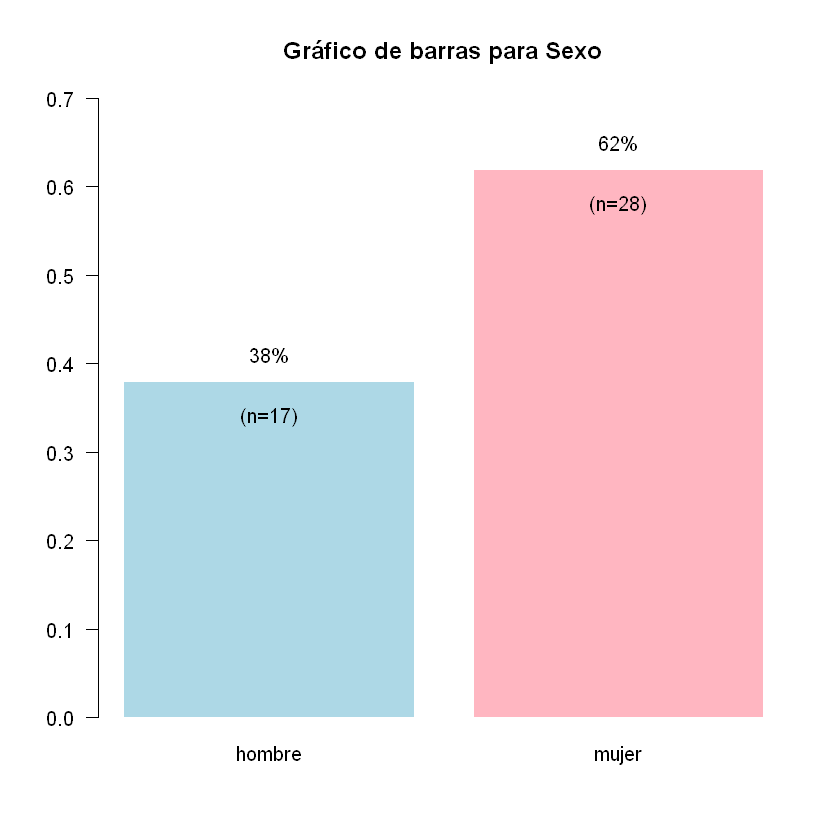

In [25]:
#sexo
frec_rel2 <- round(prop.table(table(cualitativas$sexo)), 2)
frec_abs2 <- table(cualitativas$sexo)

bar1 <- barplot(frec_rel2, border = FALSE,
                las = 1,
                col = c("lightblue", "lightpink"),
                ylim = c(0, 0.7),
                main = "Gráfico de barras para Sexo")
text(bar1, frec_rel2+0.03, paste0(frec_rel2*100, '%'), col = "black")
text(bar1, frec_rel2 - 0.04, paste0('(n=', frec_abs2, ')'), col = "black")


Para el caso de la variable casapropia, lo que realizo es un gráfico bivariante donde
comparo primero que porcentaje de gente que tiene hijos tiene casa propia y que
porcentaje que no tiene hijos tiene casa propia o no. Después también, que
porcentaje tiene casa propia dependiendo el puesto de trabajo que ocupa.

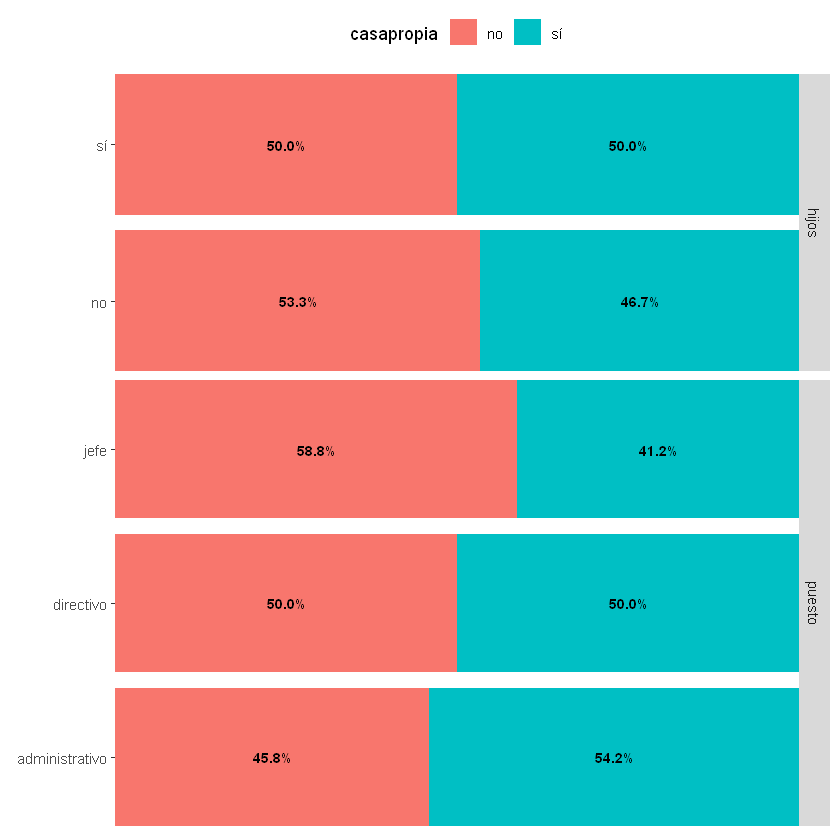

In [26]:
#casapropia - hijos, puesto
ggbivariate(cualitativas,
            outcome = "casapropia",
            explanatory = c("hijos", "puesto"),
            rowbar_args = list(
              colour = "black",
              size = 3,
              fontface = "bold"))

Realizo el mismo grafico para comparar a que horas prefiere realizar la compra según
el puesto de trabajo.

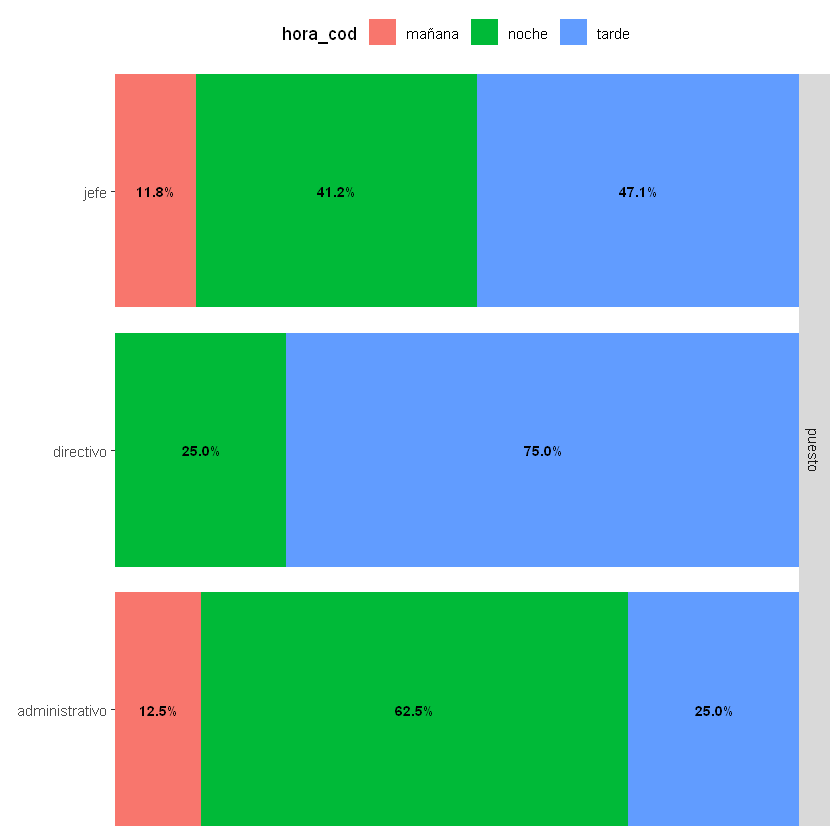

In [27]:
#hora_cod - puesto
ggbivariate(cualitativas,
            outcome = "hora_cod",
            explanatory = c("puesto"),
            rowbar_args = list(
              colour = "black",
              size = 3,
              fontface = "bold"))

## Búsqueda de datos ausentes

Para la búsqueda de datos ausentes utilizo la función is.na() para identificar los
valores ausentes y luego sumarlos para cada columna.

In [28]:
sapply(datos, function(x) sum(is.na(x)))

ciudad         sexo        hijos   casapropia       compra   horacompra 
           0            0            0            0            0            0 
gastomensual    díacompra         edad     compra_A       puesto       sueldo 
           0            0            0            0            0            0 
   años_trab     hora_cod 
           0            0

Como podemos observar, no hay ningún valor ausente para todas las columnas, por
tanto, no tenemos que hacer nada más en este caso.

## Búsqueda de valores atípicos

Para la búsqueda de casos atípicos realizo un diagrama de caja y bigotes para cada
variable cuantitativa y observo los valores atípicos que muestra el gráfico.
Comenzamos primero con la variable horacompra:

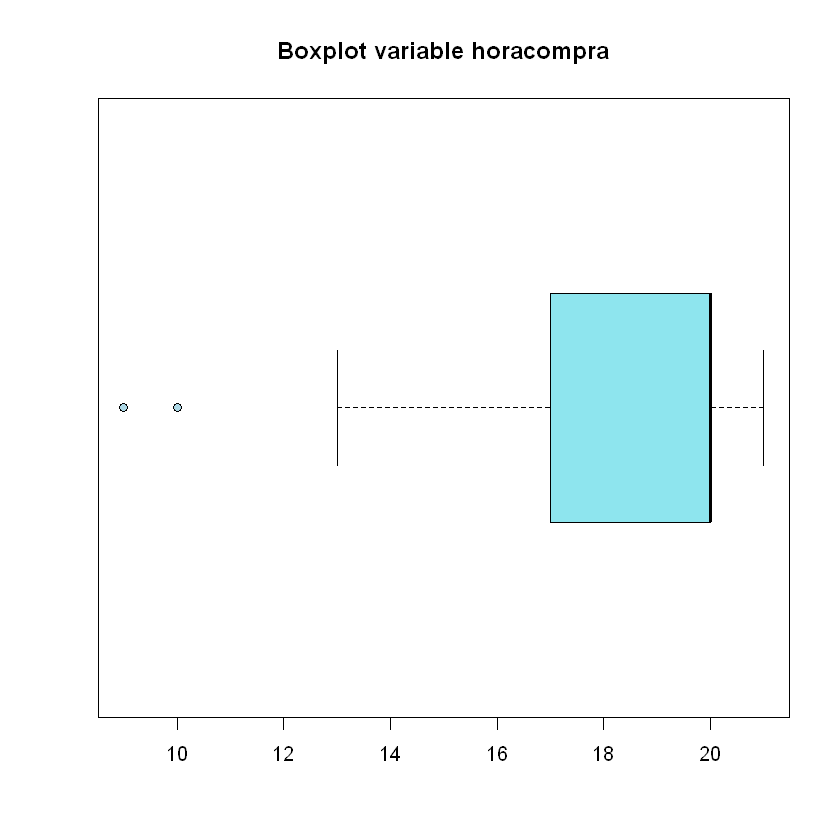

In [29]:
#boxplot horacompra
boxplot(cuantitativas$horacompra,
        col = "cadetblue2",
        horizontal = T,
        outpch = 21, outcol = "black", outbg = "lightblue",
        cex_axis = 0.8)
title("Boxplot variable horacompra")

Podemos observar que el gráfico muestra dos valores atípicos, valor 10 y valor 9.

Para el caso de la variable gastomensual, como podemos observar en el gráfico de
debajo, no hay ningún valor atípico.

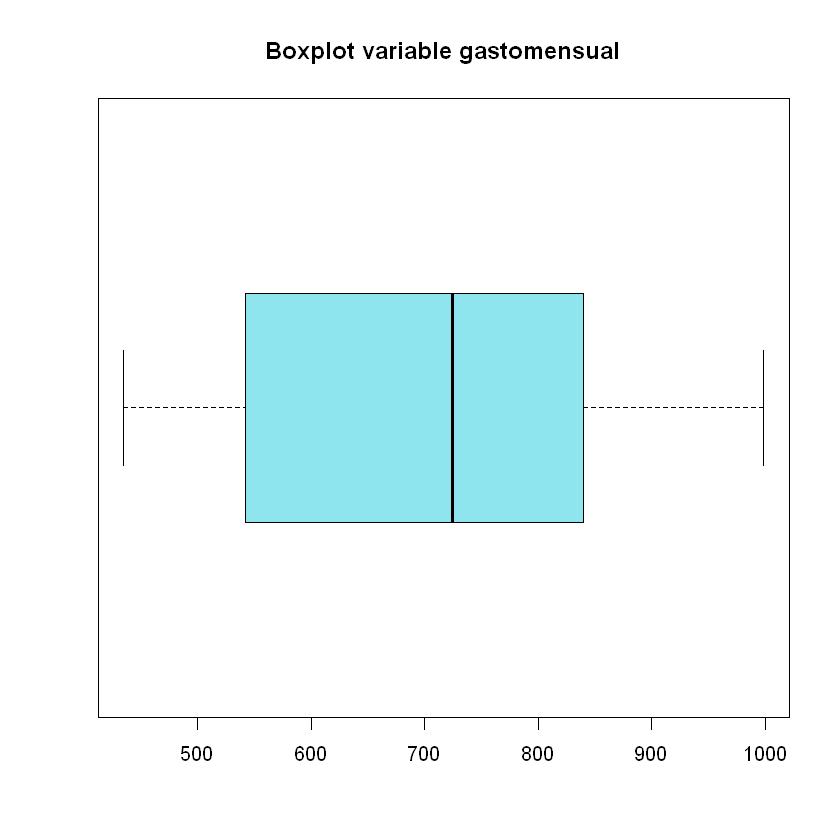

In [30]:
#boxplot gastomensual
boxplot(cuantitativas$gastomensual,
        col = "cadetblue2",
        horizontal = T,
        outpch = 21, outcol = "black", outbg = "lightblue",
        col_axis = "black",
        cex_axis = 0.8)
title("Boxplot variable gastomensual")

Para la variable edad, volvemos a no ver ningún valor atípico con el diagrama de caja.

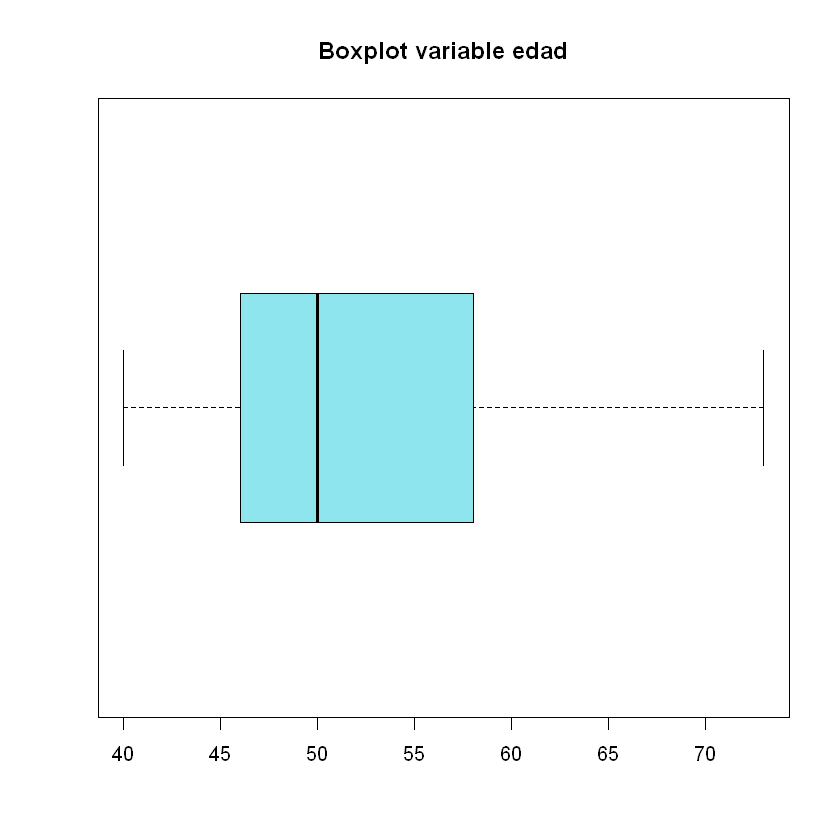

In [31]:
#boxplot edad
boxplot(cuantitativas$edad,
        col = "cadetblue2",
        horizontal = T,
        outpch = 21, outcol = "black", outbg = "lightblue",
        cex_axis = 0.8)
title("Boxplot variable edad")

En el caso de la variable sueldo, podemos observar que, si existe un valor atípico
pasado los 5000, en un valor aproximado de 5600.

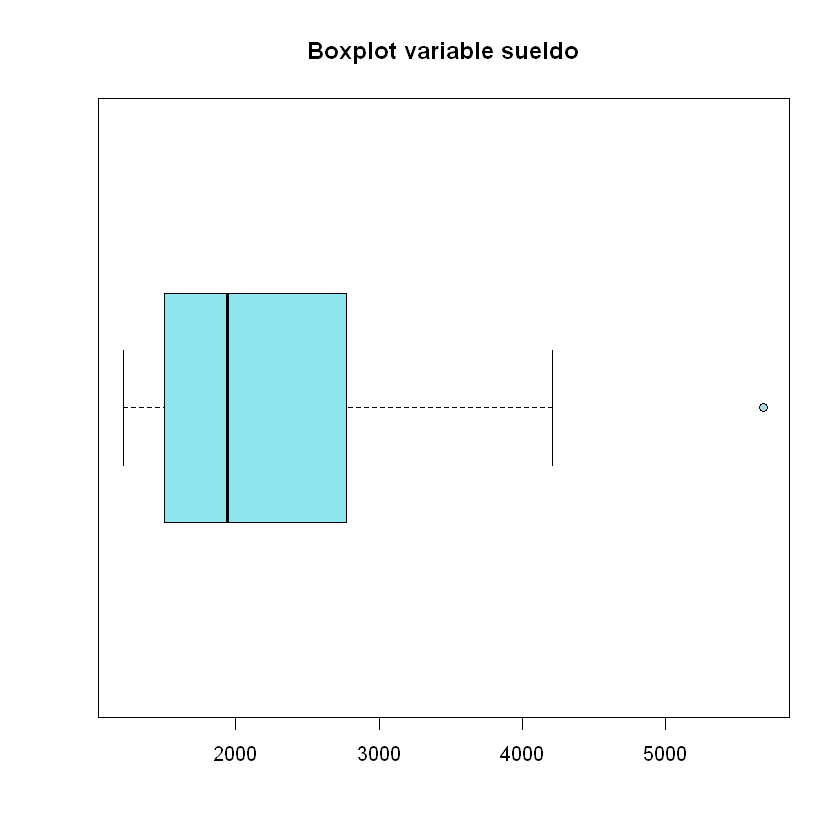

In [32]:
#boxplot sueldo
boxplot(cuantitativas$sueldo,
        col = "cadetblue2",
        horizontal = T,
        outpch = 21, outcol = "black", outbg = "lightblue",
        cex_axis = 0.8)
title("Boxplot variable sueldo")

Finalmente, para la variable años_trab no observamos ningún valor atípico.

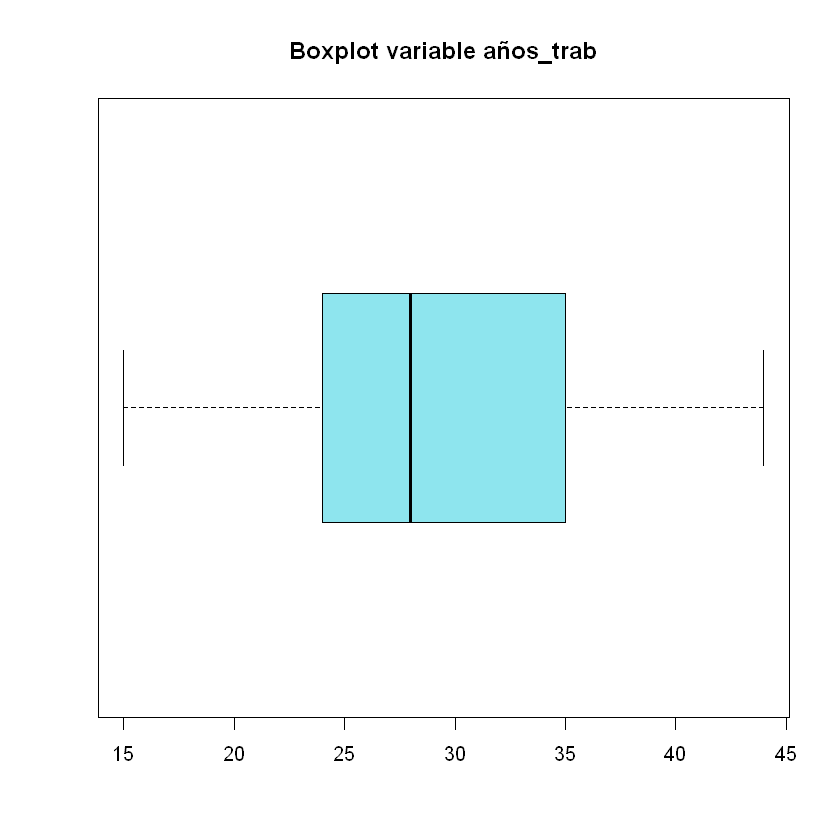

In [33]:
#boxplot años_trab
boxplot(cuantitativas$años_trab,
        col = "cadetblue2",
        horizontal = T)
title("Boxplot variable años_trab")

## Verificación de algunos supuestos básicos

Para comprobar la normalidad de las variables, he utilizado el test de Shapiro-Wilks,
que plantea la hipótesis nula que los datos provienen de una distribución normal.
Fijado un nivel de significancia = 0,05, la hipótesis nula H0: La distribución es normal;
la hipótesis H1: la distribución no es normal.
Realizo esta comprobación por cada variable cuantitativa.

Variable horacompra:

In [34]:
#shapiro test horacompra
shapiro.test(cuantitativas$horacompra)


	Shapiro-Wilk normality test

data:  cuantitativas$horacompra
W = 0.74841, p-value = 2.079e-07


Como nos muestra un valor p muy pequeño, tenemos evidencia suficiente para
rechazar la hipótesis nula y, por tanto, los datos de la variable horacompra no se
distribuyen de forma normal.


Para el caso de la variable gastomensual, observamos que el valor p es ligeramente
inferior al valor de significancia, por tanto, los datos de la variable gastomensual
podrían no seguir una distribución normal, aunque es menos evidente que en el caso
anterior.

In [35]:
#shapiro test gastomensual
shapiro.test(cuantitativas$gastomensual)


	Shapiro-Wilk normality test

data:  cuantitativas$gastomensual
W = 0.94601, p-value = 0.03595


Para el caso de la variable edad, tenemos un valor p superior al valor de significancia,
esto significa que no hay evidencia suficiente para rechazar la hipótesis nula y por
tanto, los datos de la variable edad podrían seguir una distribución normal.

In [36]:
#shapiro test edad
shapiro.test(cuantitativas$edad)


	Shapiro-Wilk normality test

data:  cuantitativas$edad
W = 0.95537, p-value = 0.08132


Para la variable sueldo, observamos que tenemos un valor p muy pequeño, por tanto,
hay evidencia suficiente para rechazar la hipótesis nula y podemos decir que los datos
de la variable sueldo no se distribuyen normalmente.

In [37]:
#shapiro test sueldo
shapiro.test(cuantitativas$sueldo)


	Shapiro-Wilk normality test

data:  cuantitativas$sueldo
W = 0.86152, p-value = 7.348e-05


Finalmente, para la variable años_trab, observamos que el valor p es un valor mayor
al nivel de significancia. Esto nos indica que no hay evidencia para rechazar la
hipótesis nula, por tanto, los valores de la variable años_trab podrían distribuirse de
forma normal.

In [38]:
#shapiro test años_trab
shapiro.test(cuantitativas$años_trab)


	Shapiro-Wilk normality test

data:  cuantitativas$años_trab
W = 0.96518, p-value = 0.1921
